# **Import Libraries**

In [ ]:
# import libraries
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import tensorflow_hub as hub
import numpy as np
from zipfile import ZipFile
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image, ImageFile, UnidentifiedImageError
from pathlib import Path
ImageFile.LOAD_TRUNCATED_IMAGES = True

# **Connecting to Gdrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with ZipFile('drive/MyDrive/food_images.zip', 'r') as zipObj:
  zipObj.extractall('drive/MyDrive')

In [ ]:
#training directory
train_dir = 'drive/MyDrive/food_images/train'

train_dir_ayam = os.path.join(train_dir, 'ayam_goreng')
train_dir_bubur = os.path.join(train_dir, 'bubur_ayam')
train_dir_es = os.path.join(train_dir, 'es_krim')
train_dir_gado = os.path.join(train_dir, 'gado_gado')
train_dir_kentang = os.path.join(train_dir, 'kentang_goreng')
train_dir_kue = os.path.join(train_dir, 'kue_coklat')
train_dir_nasi = os.path.join(train_dir, 'nasi_goreng')
train_dir_omellette = os.path.join(train_dir, 'omellette')
train_dir_rendang = os.path.join(train_dir, 'rendang')
train_dir_sandwich = os.path.join(train_dir, 'sandwich')

#testing directory
test_dir = 'drive/MyDrive/food_images/test'

test_dir_ayam = os.path.join(test_dir, 'ayam_goreng')
test_dir_bubur = os.path.join(test_dir, 'bubur_ayam')
test_dir_es = os.path.join(test_dir, 'es_krim')
test_dir_gado = os.path.join(test_dir, 'gado_gado')
test_dir_kentang = os.path.join(test_dir, 'kentang_goreng')
test_dir_kue = os.path.join(test_dir, 'kue_coklat')
test_dir_nasi = os.path.join(test_dir, 'nasi_goreng')
test_dir_omellette = os.path.join(test_dir, 'omellette')
test_dir_rendang = os.path.join(test_dir, 'rendang')
test_dir_sandwich = os.path.join(test_dir, 'sandwich')

# **Checking total image in directory**

In [ ]:
#number of image

print('\nTotal training ayam goreng images:', len(os.listdir(train_dir_ayam)))
print('Total validation ayam goreng images:', len(os.listdir(test_dir_ayam)))

print('\nTotal training bubur ayam images:', len(os.listdir(train_dir_bubur)))
print('Total validation bubur ayam images:', len(os.listdir(test_dir_bubur)))

print('\nTotal training es krim images:', len(os.listdir(train_dir_es)))
print('Total validation es krim images:', len(os.listdir(test_dir_es)))

print('\nTotal training gado gado images:', len(os.listdir(train_dir_gado)))
print('Total validation gado gado images:', len(os.listdir(test_dir_gado)))

print('\nTotal training kentang goreng images:', len(os.listdir(train_dir_kentang)))
print('Total validation kentang goreng images:', len(os.listdir(test_dir_kentang)))

print('\nTotal training kue coklat images:', len(os.listdir(train_dir_kue)))
print('Total validation kue coklat images:', len(os.listdir(test_dir_kue)))

print('\nTotal training nasi goreng images:', len(os.listdir(train_dir_nasi)))
print('Total validation nasi goreng images:', len(os.listdir(test_dir_nasi)))

print('\nTotal training omellette images:', len(os.listdir(train_dir_omellette)))
print('Total validation omellette images:', len(os.listdir(test_dir_omellette)))

print('\nTotal training rendang images:', len(os.listdir(train_dir_rendang)))
print('Total validation rendang images:', len(os.listdir(test_dir_rendang)))

print('\nTotal training sandwich images:', len(os.listdir(train_dir_sandwich)))
print('Total validation sandwich images:', len(os.listdir(test_dir_sandwich)))


Total training ayam goreng images: 400
Total validation ayam goreng images: 100

Total training bubur ayam images: 400
Total validation bubur ayam images: 100

Total training es krim images: 400
Total validation es krim images: 100

Total training gado gado images: 400
Total validation gado gado images: 100

Total training kentang goreng images: 400
Total validation kentang goreng images: 100

Total training kue coklat images: 400
Total validation kue coklat images: 100

Total training nasi goreng images: 400
Total validation nasi goreng images: 100

Total training omellette images: 400
Total validation omellette images: 100

Total training rendang images: 400
Total validation rendang images: 100

Total training sandwich images: 400
Total validation sandwich images: 100


# **Image Shape Sampling**

In [ ]:
#check image shape
sample_image  = load_img(f"{os.path.join(train_dir_sandwich, os.listdir(train_dir_sandwich)[1])}")

sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (159, 318, 3)


# **Checking Unidentified Image**

In [ ]:
#check unidentified image

path = Path("drive/MyDrive/food_images/train").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

# **Image data generating**

In [ ]:
#image data generator
train_dir = 'drive/MyDrive/food_images/train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

test_dir = 'drive/MyDrive/food_images/test'
validation_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

train_generator = training_datagen.flow_from_directory(
   train_dir,
   target_size = (224, 224),
   class_mode = 'categorical',
   batch_size = 40
)

validation_generator = validation_datagen.flow_from_directory(
   test_dir,
   target_size = (224, 224),
   class_mode='categorical',
   batch_size = 20
)

Found 4000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


# **Building The CNN Model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# **Train The Model**

In [ ]:
history = model.fit(train_generator,
                    epochs = 35,
                    steps_per_epoch = 100,
                    validation_data = validation_generator,
                    verbose = 1,
                    validation_steps = 50)

Epoch 1/35
100/100 [==============================] - 69s 690ms/step - loss: 1.5358 - accuracy: 0.4215 - val_loss: 1.4026 - val_accuracy: 0.4620
Epoch 2/35
100/100 [==============================] - 76s 760ms/step - loss: 1.4509 - accuracy: 0.4507 - val_loss: 1.2761 - val_accuracy: 0.5180
Epoch 3/35
100/100 [==============================] - 68s 678ms/step - loss: 1.3508 - accuracy: 0.4990 - val_loss: 1.2752 - val_accuracy: 0.5470
Epoch 4/35
100/100 [==============================] - 68s 683ms/step - loss: 1.2988 - accuracy: 0.5242 - val_loss: 1.2722 - val_accuracy: 0.5200
Epoch 5/35
100/100 [==============================] - 74s 737ms/step - loss: 1.2688 - accuracy: 0.5293 - val_loss: 1.1221 - val_accuracy: 0.5970
Epoch 6/35
100/100 [==============================] - 68s 680ms/step - loss: 1.2076 - accuracy: 0.5565 - val_loss: 1.0843 - val_accuracy: 0.6030
Epoch 7/35
100/100 [==============================] - 68s 679ms/step - loss: 1.1597 - accuracy: 0.5785 - val_loss: 1.0794 - val_ac

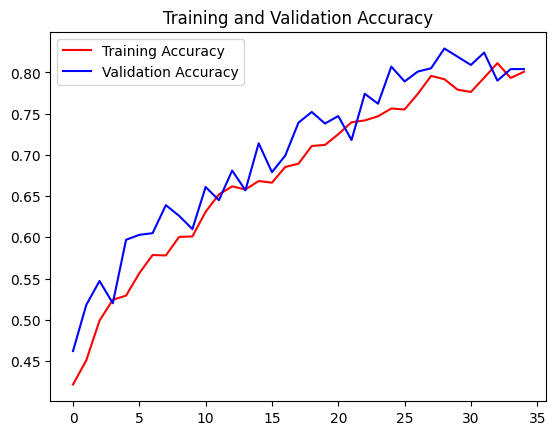

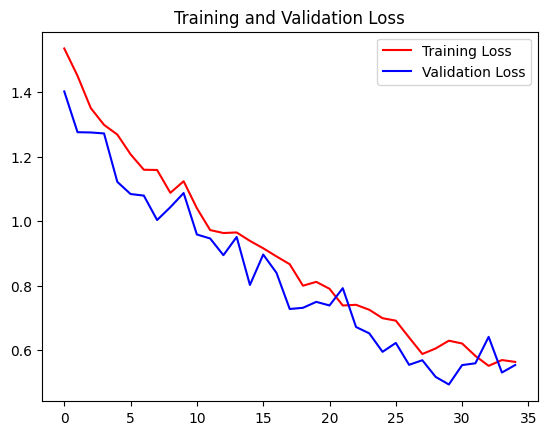

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# **Predicting Image Using The Model**

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=6)
  print(classes)
  output_class = np.argmax(classes)
  classname = ["ayam_goreng", "bubur_ayam", "es_krim", "gado_gado", "kentang_goreng", "kue_coklat", "nasi_goreng", "omellette", "rendang", "sandwich"]
  print("The predicted class is", classname[output_class])

Saving sausage-fried-rice-with-tomatoes-carrots-shiitake-mushrooms-plate.jpg to sausage-fried-rice-with-tomatoes-carrots-shiitake-mushrooms-plate.jpg
1/1 [==============================] - 0s 21ms/step
[[4.3442016e-03 1.7753091e-03 4.1277408e-06 2.6045777e-04 5.3004455e-03
  2.9372953e-09 7.9619515e-01 1.9080313e-01 6.3846210e-06 1.3107511e-03]]
The predicted class is nasi_goreng


In [ ]:
model.save('CapstoneCNNModel80val.h5', save_format='h5')

# **Transfer Learning Using MobileNetV2**

In [ ]:
#Transfer Learning
mobilenet_v2_100 = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5'

# **Image data generating**

In [ ]:
TRAINING_DIR = 'drive/MyDrive/food_images/train'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

VALIDATION_DIR = 'drive/MyDrive/food_images/test'
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

train_generator = training_datagen.flow_from_directory(
  TRAINING_DIR,
  target_size = (224, 224),
  class_mode = 'categorical',
  batch_size = 400,
)

test_generator = training_datagen.flow_from_directory(
  VALIDATION_DIR,
  target_size = (224, 224),
  class_mode = 'categorical',
  batch_size = 100,
)

Found 4000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3),
                                               include_top = False,
                                               weights = 'imagenet')

# **Set The Trainable to False**

In [ ]:
base_model.trainable = False

# **Make The Model**

In [ ]:
model2 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,918,986
Trainable params: 661,002
Non-

In [ ]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# **Train The Model**

In [ ]:
history = model2.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 10,
                    verbose = 1,
                    steps_per_epoch = 10,
                    validation_steps = 10)

Epoch 1/10
10/10 [==============================] - 640s 68s/step - loss: 1.8552 - accuracy: 0.4155 - val_loss: 0.8342 - val_accuracy: 0.7560
Epoch 2/10
10/10 [==============================] - 76s 8s/step - loss: 0.8260 - accuracy: 0.7200 - val_loss: 0.5526 - val_accuracy: 0.8220
Epoch 3/10
10/10 [==============================] - 78s 8s/step - loss: 0.6534 - accuracy: 0.7790 - val_loss: 0.4809 - val_accuracy: 0.8330
Epoch 4/10
10/10 [==============================] - 76s 8s/step - loss: 0.5532 - accuracy: 0.8067 - val_loss: 0.4190 - val_accuracy: 0.8630
Epoch 5/10
10/10 [==============================] - 76s 8s/step - loss: 0.5178 - accuracy: 0.8250 - val_loss: 0.3865 - val_accuracy: 0.8700
Epoch 6/10
10/10 [==============================] - 83s 9s/step - loss: 0.4765 - accuracy: 0.8370 - val_loss: 0.3992 - val_accuracy: 0.8690
Epoch 7/10
10/10 [==============================] - 79s 8s/step - loss: 0.4415 - accuracy: 0.8457 - val_loss: 0.3311 - val_accuracy: 0.8910
Epoch 8/10
10/10 [

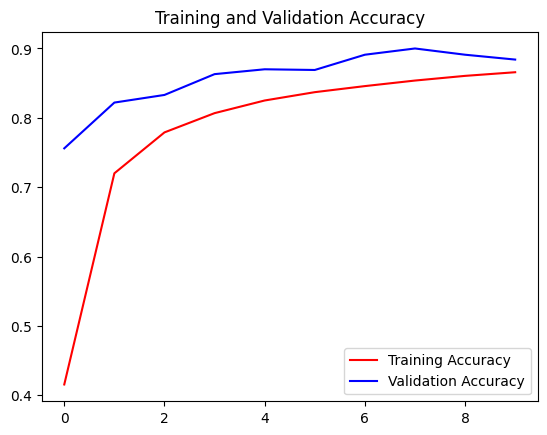

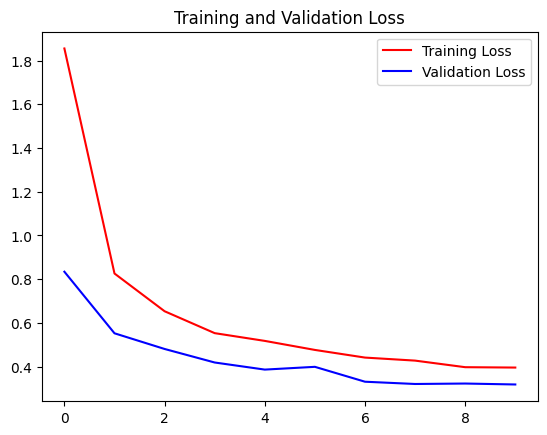

In [ ]:
#evaluate model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model2.save('CapstoneTransferLearningModel90val.h5', save_format='h5')

# **Predicting Image Using The Model**

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=6)
  print(classes)
  output_class = np.argmax(classes)
  classname = ["ayam_goreng", "bubur_ayam", "es_krim", "gado_gado", "kentang_goreng", "kue_coklat", "nasi_goreng", "omellette", "rendang", "sandwich"]
  print("The predicted class is", classname[output_class])

Saving soto.jpeg to soto (1).jpeg
1/1 [==============================] - 0s 25ms/step
[[2.4436887e-02 4.1288075e-01 2.2437759e-03 8.3091833e-02 6.0489215e-02
  3.9544175e-04 3.3037111e-02 3.6187595e-01 4.2217337e-03 1.7327340e-02]]
The predicted class is bubur_ayam


In [ ]:
try:
    new_image_pred_class = np.argmax(classes, axis=1)
    new_image_pred_prob = np.max(classes)

    if new_image_pred_prob > 0.7:
        predicted_class = new_image_pred_class[0]
        predicted_label = validation_generator.class_indices
        for label, index in predicted_label.items():
            if index == predicted_class:
                print('Prediksi:', label)
    else:
        print('Gambar tidak ada dalam database.')

except FileNotFoundError:
    print('Gambar tidak ditemukan.')

Gambar tidak ada dalam database.


# **Save Choosen Model**

In [ ]:
export_dir = './save_model/1'
tf.saved_model.save(model2, export_dir)


# **Convert to TFlite**

In [ ]:
# pilih mode
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.DEFAULT
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set optimasi
converter.optimizations = [optimization]

# Convert
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./model2.tflite')
tflite_model_file.write_bytes(tflite_model)

3171296